In [97]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer as Multi 


In [98]:
dataFrame = pd.read_csv(r'C:\Users\temi.owolabi\Documents\data_science\projects\framingham.csv')

In [99]:
dataFrame.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [100]:
dataFrame

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [101]:
data_titles = dataFrame.columns

In [102]:
for i in range(0, len(data_titles)):
    column_name = data_titles[i]
    dataFrame[column_name].fillna(int(dataFrame[column_name].mean()),inplace= True)

C:\Users\temi.owolabi\AppData\Local\Temp\ipykernel_16144\2329504227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame[column_name].fillna(int(dataFrame[column_name].mean()),inplace= True)


In [103]:
features= dataFrame[['age','currentSmoker','cigsPerDay',"BPMeds",
                     'prevalentStroke',"prevalentHyp",'diabetes','totChol',"sysBP",'diaBP','BMI','heartRate','glucose']]
target = dataFrame['TenYearCHD']

In [104]:
# features.insert(0,'age',dataFrame['age'])

#### Time to perform multi-hot encoding

In [105]:
# mlb = Multi()
# newFeature = mlb.fit_transform(features)
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j] = 1.
    return results

In [106]:
# 

In [107]:
features.shape

(4238, 13)

In [124]:
x_train = features.iloc[:3390,:]
# x_train = tf.random.shuffle(x_train)
x_test = features.iloc[3391:,:]
y_train = target.iloc[:3390]
y_test = target.iloc[3391:]


In [168]:
model = tf.keras.Sequential([
    tf.keras.layers.CategoryEncoding(num_tokens=number_token,output_mode='multi_hot'),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=20,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
    
])

In [172]:
model.compile(
    # optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [177]:
history = model.fit(x_train,y_train, epochs=3,validation_split=0.2,verbose=0,batch_size=100)

In [178]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epoch = history.epoch
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

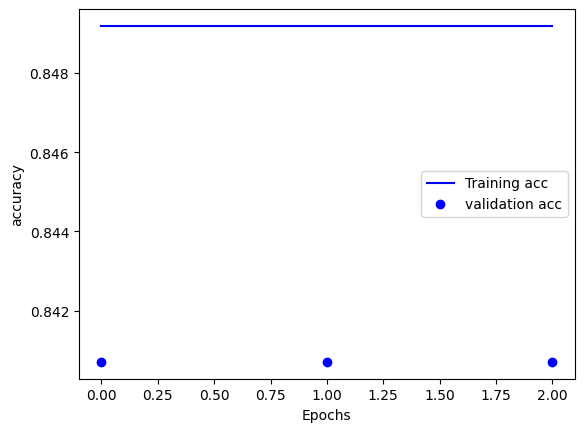

In [179]:
plt.plot(epoch,accuracy,"b", label="Training acc")
plt.plot(epoch,val_accuracy,"bo", label="validation acc")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

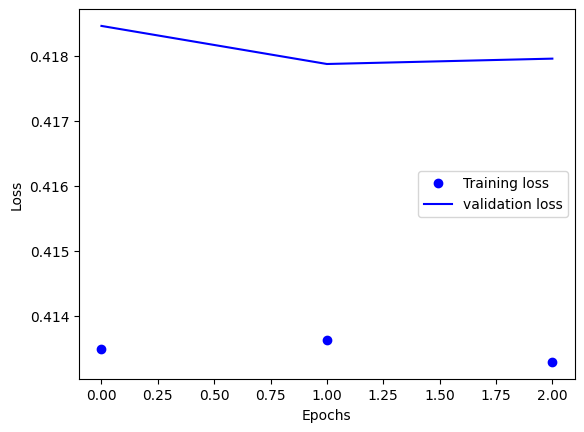

In [180]:
plt.clf
plt.plot(epoch,loss,"bo",label="Training loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epoch,val_loss,"b",label= 'validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [183]:
eval = model.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8618 - loss: 0.3967


In [199]:
# predicted = hist.predict(x_test.iloc[0])
model.predict(x_test.iloc[1])
# x_axis = range(1,len(predicted)+ 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


array([[0.29880214],
       [0.40899262],
       [0.19459292],
       [0.09711406],
       [0.09711406],
       [0.09711406],
       [0.09711406],
       [0.29880214],
       [0.29880214],
       [0.29880214],
       [0.29880214],
       [0.29880214],
       [0.29880214]], dtype=float32)

In [200]:
model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([[0.21766414],
       [0.08287052],
       [0.09711406],
       [0.12867287],
       [0.21766414],
       [0.21766414],
       [0.21766414],
       [0.1111904 ],
       [0.09711406],
       [0.21766414],
       [0.12867287],
       [0.06679236],
       [0.21766414],
       [0.21766414],
       [0.09711406],
       [0.21766414],
       [0.21766414],
       [0.09711406],
       [0.21766414],
       [0.1425496 ],
       [0.12867287],
       [0.09711406],
       [0.21766414],
       [0.09711406],
       [0.21766414],
       [0.09711406],
       [0.09711406],
       [0.21766414],
       [0.21766414],
       [0.09711406],
       [0.21766417],
       [0.21766417],
       [0.21766414],
       [0.09711406],
       [0.21766414],
       [0.09711406],
       [0.21766414],
       [0.21766414],
       [0.21766414],
       [0.21766414],
       [0.09711406],
       [0.12867287],
       [0.1111904 ],
       [0.12867287],
       [0.09711406],
       [0.09711406],
       [0.21766414],
       [0.097